In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load The Data Set
data = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
# Explore The Data Set
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.shape

(4746, 12)

In [5]:
data.sample(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2961,2022-07-04,3,40000,180,Ground out of 4,Carpet Area,Janakpuri,Delhi,Unfurnished,Bachelors,3,Contact Agent
194,2022-06-26,2,5000,392,Ground out of 2,Super Area,Jadavpur,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4386,2022-06-13,3,20000,1500,5 out of 6,Super Area,"Miyapur, NH 9",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
3279,2022-05-25,2,16000,960,2 out of 4,Super Area,Porur,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner
4725,2022-05-14,1,9000,650,1 out of 3,Super Area,"Basheer Bagh, NH 7",Hyderabad,Furnished,Bachelors/Family,1,Contact Agent
1332,2022-05-13,1,50000,410,6 out of 12,Carpet Area,Dadar East,Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Agent


In [6]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [7]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [9]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [12]:
#Drop The Columns Not Required
#axis =1 means we are dropping columns
#axis = 0 means we are dropping rows
data = data.drop(['Posted On', 'Floor', 'Area Locality'], axis=1)

In [13]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [32]:
data.shape

(4746, 9)

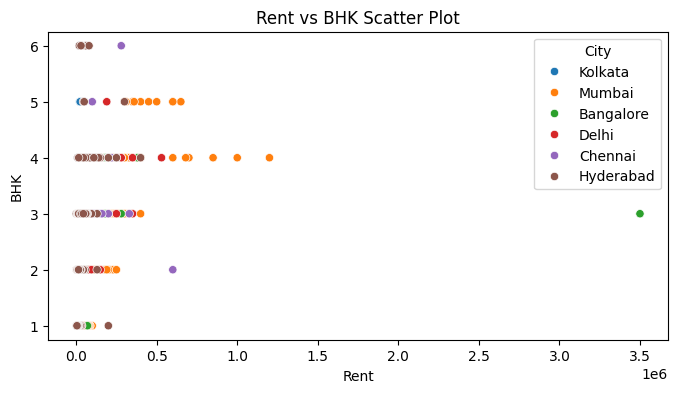

In [33]:
#Scatter Plot
plt.figure(figsize = (8,4))
sns.scatterplot(x = "Rent" , y ="BHK" , hue="City" , data = data)
plt.title("Rent vs BHK Scatter Plot")
plt.show()

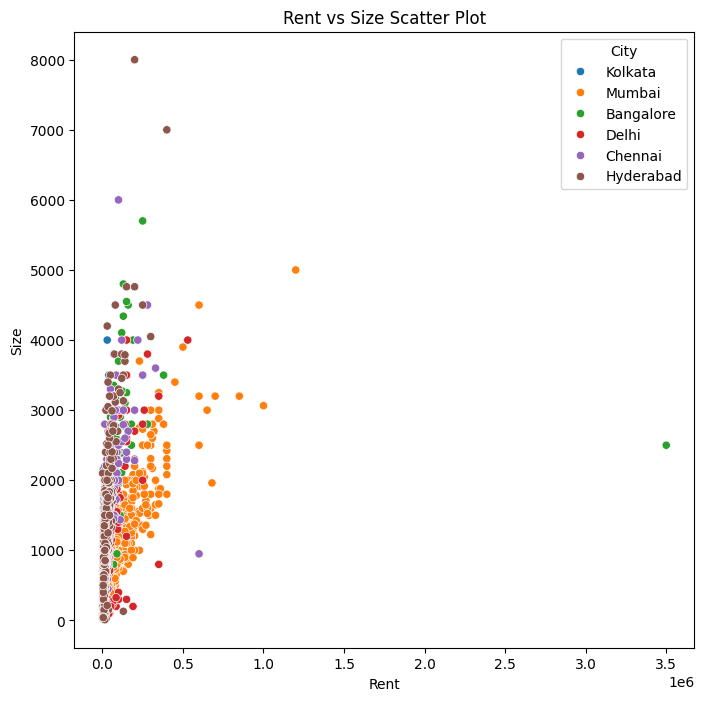

In [24]:
#Scatter Plot
plt.figure(figsize = (8,8))
sns.scatterplot(x = "Rent" , y ="Size" , hue="City" , data = data)
plt.title("Rent vs Size Scatter Plot")
plt.show()

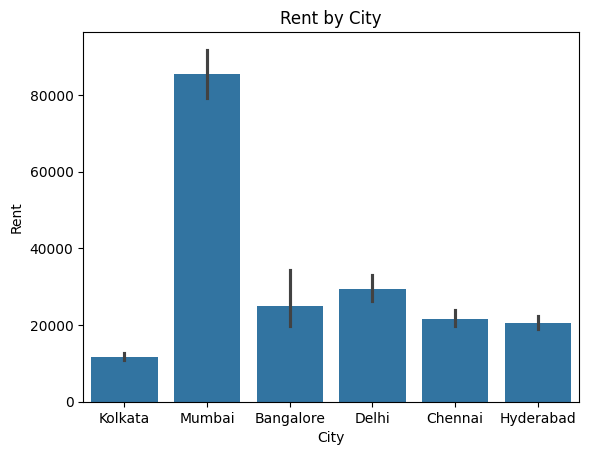

In [25]:
#Rent by city
sns.barplot(x="City", y="Rent", data=data)
plt.title("Rent by City")
plt.show()

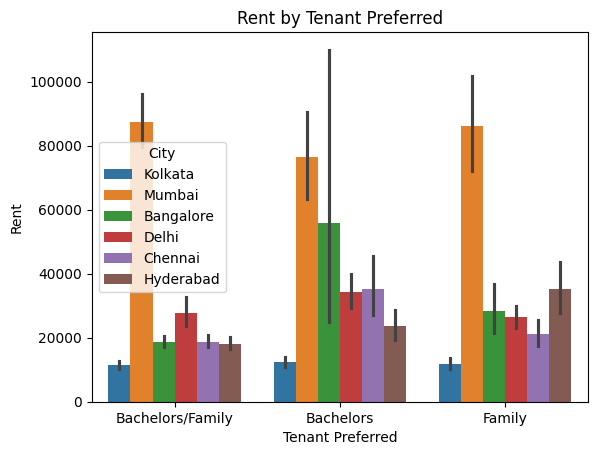

In [34]:
sns.barplot(x="Tenant Preferred" , y = "Rent" , hue="City", data = data)
plt.title("Rent by Tenant Preferred")
plt.show()

#Data Processing and Splitting

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [39]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [42]:
for col in categorical_cols:
    print(f"{col} : {data[col].nunique()}") #unique()

Area Type : 3
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3


In [43]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [47]:
x = data.drop(columns="Rent")
y = data['Rent']

In [49]:
x.head()


,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [50]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [52]:
#encoder leaveOnehotencoder
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x , y)

In [55]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [59]:
x_df = pd.DataFrame(x)

In [60]:
x_df.head()

,0,1,2,3,4,5,6,7
0,0.2,0.136421,0.273162,0.004388,0.009553,0.017960,0.111111,0.003219
1,0.2,0.098874,0.273074,0.004130,0.487075,0.017809,0.000000,0.003165
2,0.2,0.123905,0.273100,0.004207,0.487114,0.017854,0.000000,0.003181
3,0.2,0.098874,0.273162,0.004388,0.009553,0.017960,0.000000,0.003219
4,0.2,0.105131,0.999941,0.004452,0.009593,0.587919,0.000000,0.003233


In [61]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
x_train.shape , y_test.shape

((3796, 8), (950,))

In [65]:
x_test.shape , y_test.shape

((950, 8), (950,))

##Training Models and Evaluation of Linear Reagression , Random Foret , Decision Tree

In [68]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
#model_xgb = XGBRegressor(Objective ='reg:squarederror')
models  = [model_rfr , model_dt , model_lr]

In [70]:
#Fitting data in all three Models
for model in models:
    print(f"Training {model}")
    model.fit(x_train , y_train)

Training RandomForestRegressor()
Training DecisionTreeRegressor()
Training LinearRegression()


In [73]:
#checking the accuracy of all three models
for model in models:
    print(f"score of {model} is : {model.score(x_test , y_test)}")

score of RandomForestRegressor() is : 0.9375211834744052
score of DecisionTreeRegressor() is : 0.9380587406225009
score of LinearRegression() is : 0.5153586519637792


In [82]:
new_data = pd.DataFrame( 
    {
    'BHK' : [2],
    'Size' : [1500],
    "Area Type" : ['Super Area'],
    "City" :["Bangalore"],
    "Furnishing Status" : ["Furnished"],
    "Tenant Preferred" : ["Family"],
    "Bathroom" : [2],
    "Point of Contact" : ["Contact Owner"]
    }
    
    )


new_data_encoder = encoder.transform(new_data)
new_data_scaled = scaler.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)

print(f"The Predicted Rent for the new data is : {predicted_rent[0]}")

The Predicted Rent for the new data is : 16480.0


#Deployment 

In [85]:
import pickle

# Save model
pickle.dump(model_rfr, open("rent_model.pkl", "wb"))

# Save encoder
pickle.dump(encoder, open("encoder.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("✅ Model, Encoder & Scaler saved successfully")


✅ Model, Encoder & Scaler saved successfully
